In [1]:
# stop warnings
import warnings
warnings.filterwarnings("ignore")

# imports
import os
import sys
import json
import glob
import numpy as np
np.random.seed(1234)
import ipdb
import importlib
import cortex
import nibabel as nb
import matplotlib.pyplot as plt
deb = ipdb.set_trace

# functions import
sys.path.append("{}/../../utils".format(os.getcwd()))
from pycortex_utils import set_pycortex_config_file

In [2]:
# main_dir = sys.argv[1]
# project_dir = sys.argv[2]
# subject = sys.argv[3]
# save_svg_in = sys.argv[4]

main_dir = '/Users/uriel/disks/meso_shared'
project_dir = 'RetinoMaps'
subject = 'sub-02'
task = 'pMF'
session = 'ses-02'
high_pass_type ='dct'





cortex_dir = "{}/{}/derivatives/pp_data/cortex".format(main_dir, project_dir)
corr_dir = "{}/{}/derivatives/pp_data/{}/func/fmriprep_dct_corr/fsnative".format(main_dir, project_dir,subject)



In [3]:
set_pycortex_config_file(cortex_dir)
importlib.reload(cortex)

<module 'cortex' from '/Users/uriel/softwares/anaconda3/envs/amblyo_env/lib/python3.9/site-packages/cortex/__init__.py'>

In [5]:
# load BOLD Data

# ## Load dtseries 
# dtseries_path = '/Users/uriel/disks/meso_shared/RetinoMaps/derivatives/fmriprep/fmriprep/{}/{}/func'.format(subject,session)
# dtseries_name_L ='{}_{}_task-{}_run-01_hemi-L_space-fsnative_bold.func.gii'.format(subject,session,task)
# dtseries_name_R ='{}_{}_task-{}_run-01_hemi-R_space-fsnative_bold.func.gii'.format(subject,session,task)

# img_dtseries_L = nb.load('{}/{}'.format(dtseries_path,dtseries_name_L))
# img_dtseries_R = nb.load('{}/{}'.format(dtseries_path,dtseries_name_R))


In [5]:
dtseries_data_L = [x.data for x in img_dtseries_L.darrays]
dtseries_data_L = np.vstack(dtseries_data_L) 

In [6]:
dtseries_data_R = [x.data for x in img_dtseries_R.darrays]
dtseries_data_R = np.vstack(dtseries_data_R) 

In [7]:
np.shape(dtseries_data_L)

(208, 147618)

In [8]:
datseries_data_concat = np.concatenate((dtseries_data_L[1],dtseries_data_R[1]))

In [9]:
np.shape(datseries_data_concat)

(294496,)

In [ ]:
# Plot BOLD

# # In order to get the number of vertices in this subject's cortical surface
# # we have to load in their surfaces and get the number of points in each
# surfs = [cortex.polyutils.Surface(*d)
#          for d in cortex.db.get_surf(subject, "fiducial")]

# # This is the total number of vertices in both hemispheres combined
# num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]

# # Creating a random dataset with one entry for each vertex

# test_data = np.random.randn(num_verts)
# # This creates a Vertex object for our subject and test dataset
# vertex_data = cortex.Vertex(datseries_data_concat, subject)
# # And now we can display it on a flatmap
# cortex.quickshow(vertex_data)
# plt.show()

In [6]:
# load correlation data
corr_fn_L = "{}/{}_task-{}_hemi-L_fmriprep_{}_correlations_bold.func.gii".format(corr_dir, subject, task,high_pass_type)
corr_fn_R = "{}/{}_task-{}_hemi-R_fmriprep_{}_correlations_bold.func.gii".format(corr_dir, subject, task,high_pass_type)

img_corr_L = nb.load(corr_fn_L)
img_corr_R = nb.load(corr_fn_R)

In [7]:
corr_data_L = [x.data for x in img_corr_L.darrays]
corr_data_L = np.vstack(corr_data_L)

In [11]:
corr_data_R = [x.data for x in img_corr_R.darrays]
corr_data_R = np.vstack(corr_data_R)

corr_data_concat = np.concatenate((corr_data_L,corr_data_R))
vecteur = corr_data_concat.reshape(corr_data_concat.shape[0])

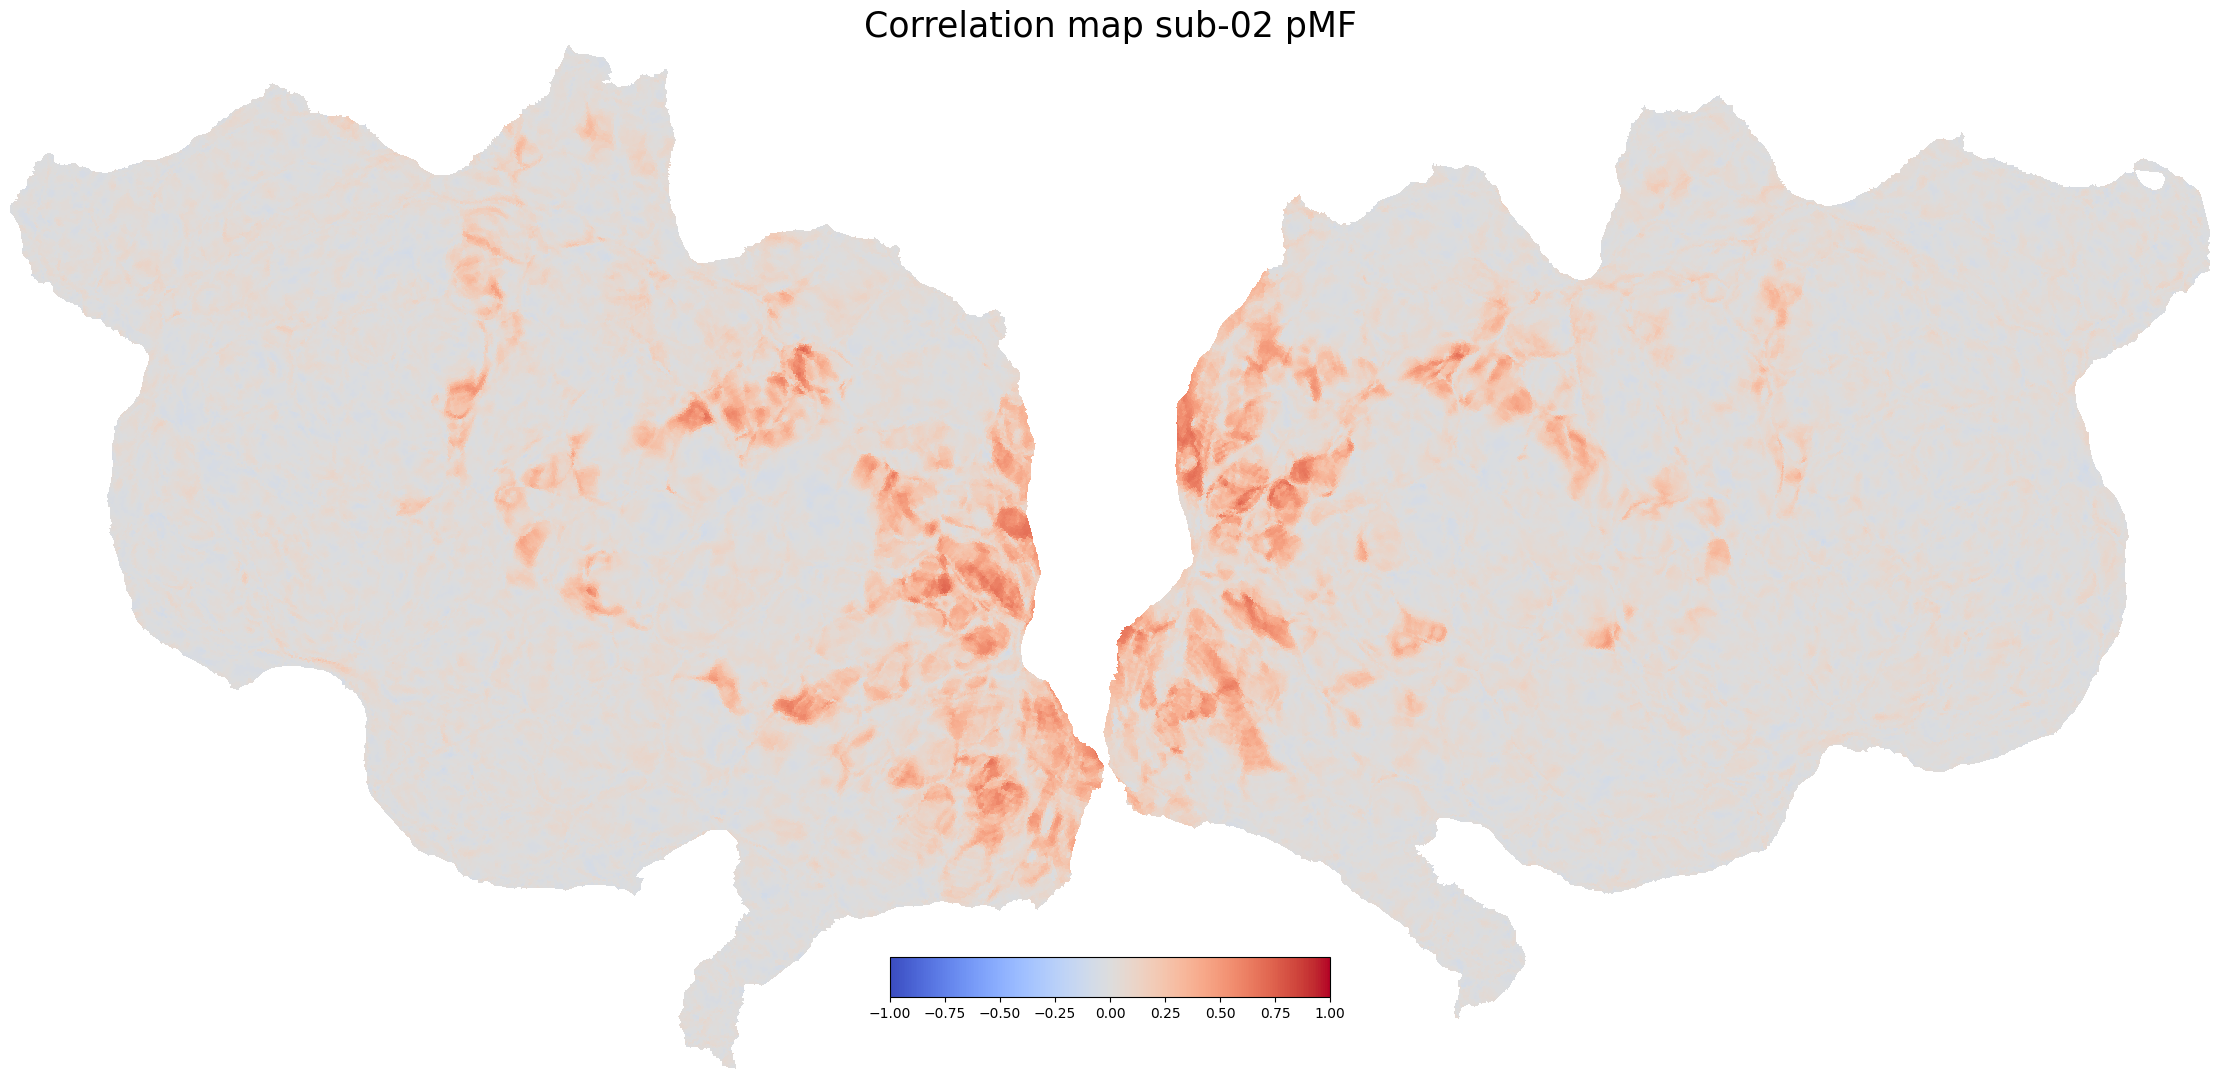

In [47]:
# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# This is the total number of vertices in both hemispheres combined
num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]

# Creating a random dataset with one entry for each vertex

test_data = np.random.randn(num_verts)
# This creates a Vertex object for our subject and test dataset
orig_map=plt.cm.get_cmap('RdYlBu') 
 
# reversing the original colormap using reversed() function 
reversed_map = orig_map.reversed()
vertex_data = cortex.Vertex(vecteur, subject, cmap='coolwarm',vmin=-1,vmax=1)
# And now we can display it on a flatmap
cortex.quickshow(vertex_data)
plt.title("Correlation map {} {}".format(subject,task),fontsize=25)
plt.show()



In [21]:
# In order to get the number of vertices in this subject's cortical surface
# we have to load in their surfaces and get the number of points in each
surfs = [cortex.polyutils.Surface(*d)
         for d in cortex.db.get_surf(subject, "fiducial")]

# This is the total number of vertices in both hemispheres combined
num_verts = surfs[0].pts.shape[0] + surfs[1].pts.shape[0]

# Creating a random dataset with one entry for each vertex

test_data = np.random.randn(num_verts)
# This creates a Vertex object for our subject and test dataset
vertex_data = cortex.Vertex(a, subject)
# And now we can display it on a flatmap
cortex.quickshow(vertex_data)
plt.show()

# # We can also plot just the left hemisphere data
# numl = surfs[0].pts.shape[0]
# # This creates a Vertex object with an array only as long as the number of
# # vertices in the left hemisphere, and the right hemisphere will be filled
# # in with zeros
# vertex_data_left = cortex.Vertex(test_data[:numl], subject)
# cortex.quickshow(vertex_data_left)
# plt.show()

ValueError: Invalid number of vertices for subject (given 295236, should be 170101 for left hem, 171810 for right hem, or 341911 for both)

In [15]:
num_verts



341911

In [26]:
ffa_map = cortex.Vertex.empty('fsaverage', cmap='inferno', vmin=0, vmax=0.3) 
#ffa_map.data = correlations
#cortex.quickshow(ffa_map, with_labels=True, Label = "Figure 1")

KeyError: 'fsaverage'